In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
from TrackReconstruction_functions import *
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D 
from matplotlib.colors import LogNorm
import matplotlib.colors as mcolors 

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [12]:
nubb_meta_1bar  = pd.read_hdf("../data/Trackreco/ATPC_0nubb_1bar_nodiff_reco.h5", "meta")
nubb_meta_5bar  = pd.read_hdf("../data/Trackreco/ATPC_0nubb_5bar_nodiff_reco.h5", "meta")
nubb_meta_10bar = pd.read_hdf("../data/Trackreco/ATPC_0nubb_10bar_nodiff_reco.h5", "meta")
nubb_meta_15bar = pd.read_hdf("../data/Trackreco/ATPC_0nubb_15bar_nodiff_reco.h5", "meta")
display(nubb_meta_1bar)
display(nubb_meta_5bar)

Tl_meta_1bar  = pd.read_hdf("../data/Trackreco/ATPC_Tl_1bar_nodiff_reco.h5", "meta")
Tl_meta_5bar  = pd.read_hdf("../data/Trackreco/ATPC_Tl_5bar_nodiff_reco.h5", "meta")
Tl_meta_10bar = pd.read_hdf("../data/Trackreco/ATPC_Tl_10bar_nodiff_reco.h5", "meta")
Tl_meta_15bar = pd.read_hdf("../data/Trackreco/ATPC_Tl_15bar_nodiff_reco.h5", "meta")
display(Tl_meta_1bar)
display(Tl_meta_15bar)

,event_id,trkID,primary,start,end,length,energy,blob1,blob2,Tortuosity1,Tortuosity2,label
0,125,0,1,14,111,3339.136,2.457110,0.625530,0.545402,2.199838,2.334565,Primary
0,126,0,1,35,64,3483.548,2.437890,0.598350,0.569433,1.835691,2.562163,Primary
0,126,1,0,0,0,0.000,0.022494,0.022494,0.022494,1.000000,1.000000,Brem
0,127,0,1,117,118,2858.363,2.300101,0.549494,0.508871,2.774625,1.925596,Primary
0,127,1,0,0,0,0.000,0.029537,0.029537,0.029537,1.000000,1.000000,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...
0,1308,1,0,15,15,0.000,0.030157,0.030157,0.030157,1.000000,1.000000,Brem
0,1308,2,0,20,20,0.000,0.060066,0.060066,0.060066,1.000000,1.000000,Brem
0,1308,3,0,63,63,0.000,0.030281,0.030281,0.030281,1.000000,1.000000,Brem
0,1309,0,1,22,91,3501.699,2.434517,0.541880,0.518965,3.003698,1.610181,Primary


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,Tortuosity1,Tortuosity2,label
0,50,0,1,3,13,454.421,2.458870,0.924122,0.624861,1.263507,1.673627,Primary
0,51,0,1,0,13,315.604,2.458226,1.259121,0.878515,1.267842,1.396953,Primary
0,52,0,1,2,8,457.659,2.452125,0.749878,0.569532,1.986197,1.179393,Primary
0,53,0,1,0,15,363.856,2.118838,0.773760,0.767560,1.321677,2.784940,Primary
0,53,1,0,10,8,39.387,0.338966,0.338966,0.338966,1.000000,1.000000,Delta0
...,...,...,...,...,...,...,...,...,...,...,...,...
0,528,0,1,0,28,666.495,2.461078,0.646809,0.432239,1.264537,1.024626,Primary
0,529,0,1,4,17,417.268,2.461747,0.860982,0.812051,2.082900,1.471889,Primary
0,530,0,1,19,24,540.905,2.458474,0.511946,0.402653,1.198438,3.620206,Primary
0,531,0,1,7,21,491.315,2.450190,0.832809,0.784622,1.786947,1.213514,Primary


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,Tortuosity1,Tortuosity2,label
0,126000,0,1,82,120,68.675,2.049274,0.590786,0.261863,2.865280,1.038937,Primary
0,126000,1,0,52,52,0.000,0.029735,0.029735,0.029735,1.000000,1.000000,Brem
0,126000,2,0,137,139,68.675,0.165912,0.165912,0.165912,1.256059,1.256059,Brem
0,126000,3,0,132,134,22.235,0.090594,0.090594,0.090594,1.008913,1.008913,Brem
0,126000,4,0,135,136,22.235,0.143344,0.143344,0.143344,1.000000,1.000000,Brem
...,...,...,...,...,...,...,...,...,...,...,...,...
0,360057,3,0,144,146,32.627,0.141137,0.141137,0.141137,1.135385,1.135385,Brem
0,360058,0,1,0,66,53.973,2.133792,0.515394,0.341149,2.256718,1.022118,Primary
0,360058,1,0,146,149,53.973,0.184785,0.184785,0.184785,1.069090,1.069090,Brem
0,360059,0,1,45,48,2346.758,2.022291,0.613205,0.243065,3.258269,1.040130,Primary


,event_id,trkID,primary,start,end,length,energy,blob1,blob2,Tortuosity1,Tortuosity2,label
0,126000,0,1,3,6,91.652,1.925398,1.158482,0.422468,1.994414,1.814373,Primary
0,126000,1,0,8,10,91.652,0.669228,0.495157,0.174071,1.047842,1.047842,Brem
0,126001,0,1,3,4,97.451,2.353396,1.084454,0.984907,3.664462,3.664462,Primary
0,126001,1,0,0,1,21.926,0.243858,0.243858,0.243858,1.000000,1.000000,Brem
0,126002,0,1,1,2,122.477,2.343402,1.123390,0.465372,3.027107,3.027107,Primary
...,...,...,...,...,...,...,...,...,...,...,...,...
0,360056,0,1,3,5,28.746,1.733371,1.259369,0.369074,1.251727,1.251727,Primary
0,360056,1,0,6,8,28.746,0.868000,0.868000,0.868000,1.065888,1.065888,Brem
0,360057,0,1,0,4,244.777,2.599561,1.764222,0.153363,1.448744,1.448744,Primary
0,360058,0,1,0,6,105.001,2.343327,1.335951,0.604153,2.391849,1.495842,Primary


In [22]:
num_nubb_1bar  = len(nubb_meta_1bar.event_id.unique())
num_nubb_5bar  = len(nubb_meta_5bar.event_id.unique())
num_nubb_10bar = len(nubb_meta_10bar.event_id.unique())
num_nubb_15bar = len(nubb_meta_15bar.event_id.unique())

num_Tl_1bar  = len(Tl_meta_1bar.event_id.unique())
num_Tl_5bar  = len(Tl_meta_5bar.event_id.unique())
num_Tl_10bar = len(Tl_meta_10bar.event_id.unique())
num_Tl_15bar = len(Tl_meta_15bar.event_id.unique())


sf_nubb_1bar = 1
sf_nubb_5bar = num_nubb_1bar/num_nubb_5bar
sf_nubb_10bar = num_nubb_1bar/num_nubb_10bar
sf_nubb_15bar = num_nubb_1bar/num_nubb_15bar
sf_Tl_1bar = num_nubb_1bar/num_Tl_1bar
sf_Tl_5bar = num_nubb_1bar/num_Tl_5bar
sf_Tl_10bar = num_nubb_1bar/num_Tl_10bar
sf_Tl_15bar = num_nubb_1bar/num_Tl_15bar

print("tot, scale fact nubb 1bar:", num_nubb_1bar, sf_nubb_1bar)
print("tot, scale fact nubb 5bar:", num_nubb_5bar, sf_nubb_5bar)
print("tot, scale fact nubb 10bar:", num_nubb_10bar, sf_nubb_10bar)
print("tot, scale fact nubb 15bar:", num_nubb_15bar, sf_nubb_15bar)

print("tot, scale fact Tl 1bar:", num_Tl_1bar, sf_Tl_1bar)
print("tot, scale fact Tl 5bar:", num_Tl_5bar, sf_Tl_5bar)
print("tot, scale fact Tl 10bar:", num_Tl_10bar, sf_Tl_10bar)
print("tot, scale fact Tl 15bar:", num_Tl_15bar, sf_Tl_15bar)

tot, scale fact nubb 1bar: 175507 1
tot, scale fact nubb 5bar: 111101 1.5797067533145517
tot, scale fact nubb 10bar: 180000 0.9750388888888889
tot, scale fact nubb 15bar: 174125 1.0079368269921034
tot, scale fact Tl 1bar: 170937 1.0267349959341745
tot, scale fact Tl 5bar: 104518 1.679203582158097
tot, scale fact Tl 10bar: 179940 0.9753640102256308
tot, scale fact Tl 15bar: 179940 0.9753640102256308


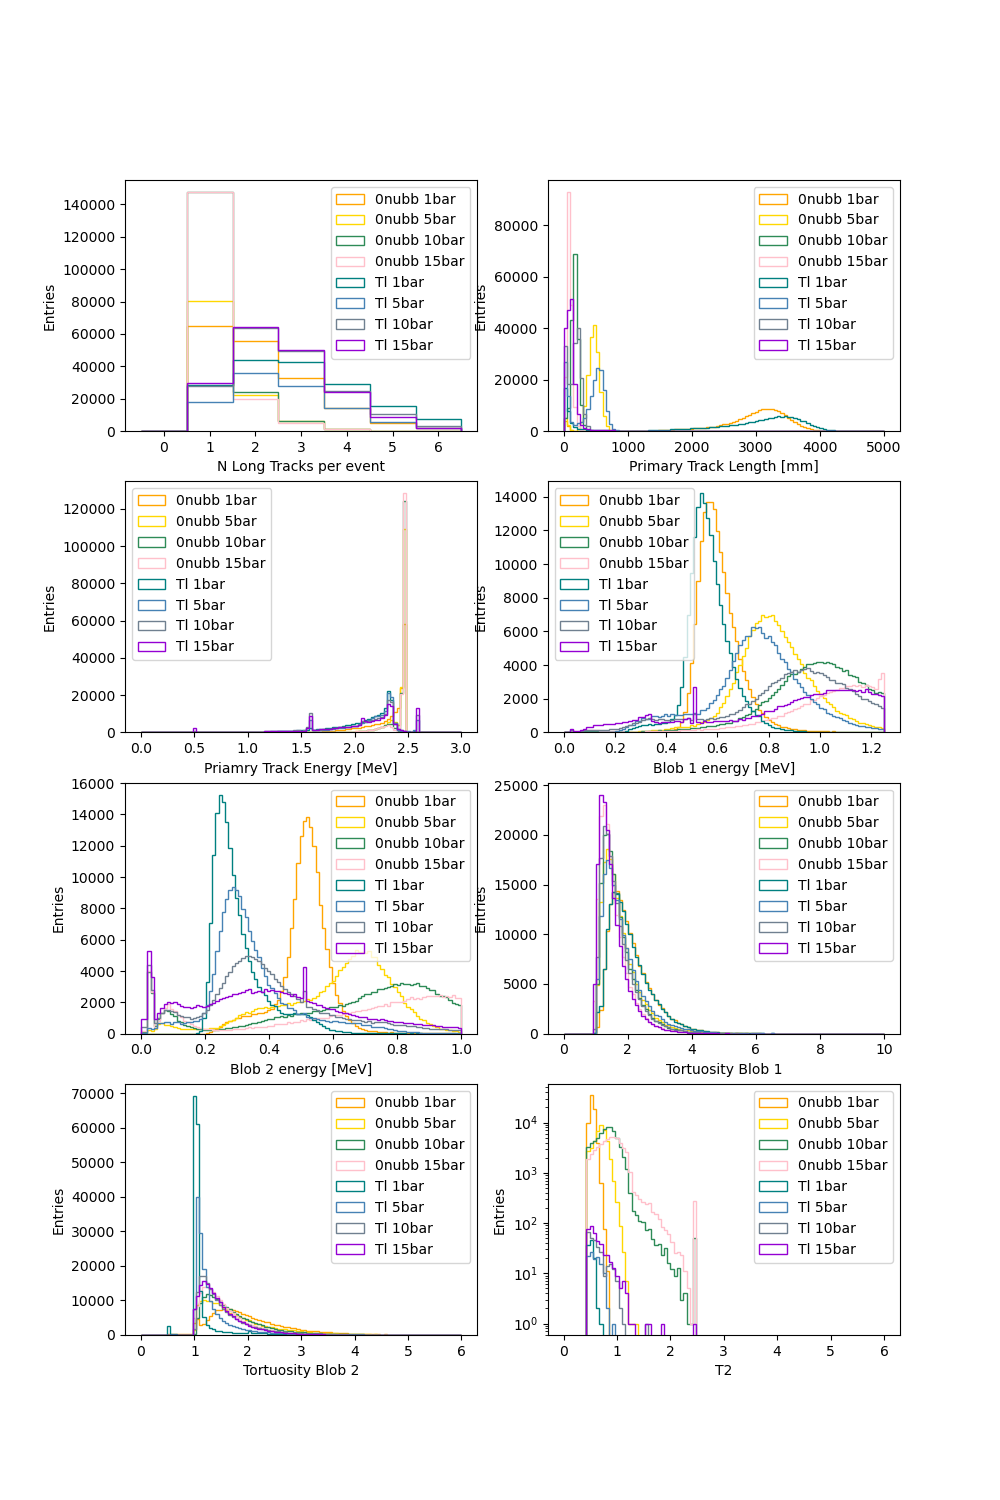

In [23]:
# Plot some variables like number of tracks
%matplotlib widget

def GetNLongTracks(df_meta):

    # Set threshold for cumulative_distance
    threshold = 0

    # Step 1: Filter rows based on cumulative_distance
    filtered_df = df_meta[df_meta["length"] >= threshold]

    # Step 2: Count unique trkID per event_id
    trk_counts = filtered_df.groupby("event_id")["trkID"].nunique().reset_index()
    trk_counts.rename(columns={"trkID": "N_tracks"}, inplace=True)

    return trk_counts

def FOM(eff, bkg_eff):
    return eff/np.sqrt(bkg_eff)


fig, axs = plt.subplots(4, 2, figsize=(10, 15))


def PlotDistributions(df_meta, col, label, scale_factor):

    df_counts = GetNLongTracks(df_meta)
    df_counts_evts = df_counts[df_counts.N_tracks >= 1].event_id.unique()

    bin_edges = np.arange(-0.5, 7.5, 1)
    bin_centers = np.arange(0, 7, 1)

    weights = np.ones_like(df_counts) * scale_factor

    # Multiplicities
    axs[0,0].hist(df_counts.N_tracks, bins = bin_edges, histtype="step", color = col, label = label);
    axs[0,0].set_xlabel("N Long Tracks per event")
    axs[0,0].set_ylabel("Entries")
    axs[0,0].set_xticks(bin_centers) ;
    axs[0,0].legend()


    df_primary = df_meta[df_meta.primary == 1]

    weights = np.ones_like(df_primary.energy) * scale_factor

    axs[1,0].hist(df_primary.energy, bins = np.linspace(0,3,100), histtype="step", color = col, label = label, weights = weights);
    axs[1,0].set_xlabel("Priamry Track Energy [MeV]")
    axs[1,0].set_ylabel("Entries")
    axs[1,0].legend()

    axs[0,1].hist(df_primary.length, bins = np.linspace(0, 5000, 100), histtype="step", color = col, label = label, weights = weights);
    axs[0,1].set_xlabel("Primary Track Length [mm]")
    axs[0,1].set_ylabel("Entries")
    axs[0,1].legend()

    axs[1,1].hist(df_primary.blob1, bins = np.linspace(0, 1.25, 100), histtype="step", color = col, label = label, weights = weights);
    axs[1,1].set_xlabel("Blob 1 energy [MeV]")
    axs[1,1].set_ylabel("Entries")
    axs[1,1].legend()

    axs[2,0].hist(df_primary.blob2, bins = np.linspace(0, 1, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,0].set_xlabel("Blob 2 energy [MeV]")
    axs[2,0].set_ylabel("Entries")
    axs[2,0].legend()

    axs[2,1].hist(df_primary.Tortuosity1, bins = np.linspace(0, 10, 100), histtype="step", color = col, label = label, weights = weights);
    axs[2,1].set_xlabel("Tortuosity Blob 1")
    axs[2,1].set_ylabel("Entries")
    axs[2,1].legend()

    axs[3,0].hist(df_primary.Tortuosity2, bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label, weights = weights);
    axs[3,0].set_xlabel("Tortuosity Blob 2")
    axs[3,0].set_ylabel("Entries")
    axs[3,0].legend()


    E_cut = 0.43

    cuts = (df_primary.energy>2.4) & \
           (df_primary.energy<2.5) & \
           (df_primary.event_id.isin(df_counts_evts)) & \
           (df_primary.blob2 > E_cut) & \
           (df_primary.Tortuosity2 > 1.5)

    axs[3,1].hist(df_primary[ cuts ].blob2,  bins = np.linspace(0, 6, 100), histtype="step", color = col, label = label);
    axs[3,1].set_xlabel("T2")
    axs[3,1].set_ylabel("Entries")
    axs[3,1].legend()
    axs[3,1].semilogy()

    return len(df_primary[ cuts ].event_id.unique())


num_nubb_1bar_cut  = PlotDistributions(nubb_meta_1bar, "orange", "0nubb 1bar", sf_nubb_1bar)
num_nubb_5bar_cut  = PlotDistributions(nubb_meta_5bar, "gold", "0nubb 5bar", sf_nubb_5bar)
num_nubb_10bar_cut = PlotDistributions(nubb_meta_10bar, "seagreen", "0nubb 10bar", sf_nubb_10bar)
num_nubb_15bar_cut = PlotDistributions(nubb_meta_15bar, "Pink", "0nubb 15bar", sf_nubb_15bar)

num_Tl_1bar_cut  = PlotDistributions(Tl_meta_1bar, "Teal", "Tl 1bar", sf_Tl_1bar)
num_Tl_5bar_cut  = PlotDistributions(Tl_meta_5bar, "steelblue", "Tl 5bar", sf_Tl_5bar)
num_Tl_10bar_cut = PlotDistributions(Tl_meta_10bar, "slategray", "Tl 10bar", sf_Tl_10bar)
num_Tl_15bar_cut = PlotDistributions(Tl_meta_15bar, "darkviolet", "Tl 15bar", sf_Tl_15bar)


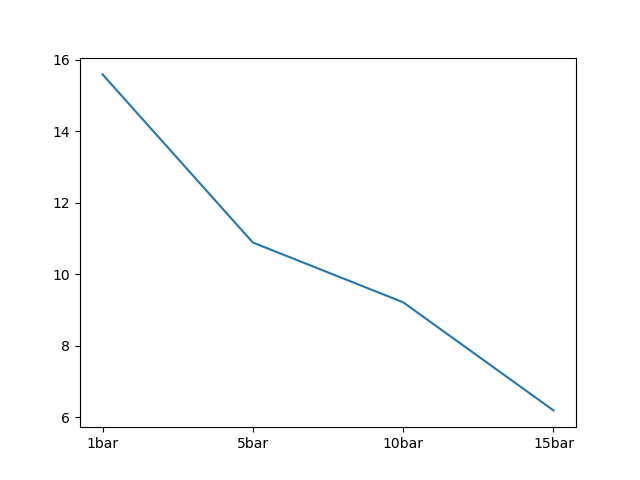

In [25]:
# print(len(nubb_meta.event_id.unique()), len(nubb_topology_evts), " Eff = ", 100 * len(nubb_topology_evts)/len(nubb_meta.event_id.unique()))
# print(len(Tl_meta.event_id.unique()), len(Tl_topology_evts), " Eff = ", 100 * len(Tl_topology_evts)/len(Tl_meta.event_id.unique()))

# print(Tl_topology_evts) 


pressures = ["1bar", "5bar", "10bar", "15bar"]
fom = [FOM(num_nubb_1bar_cut/num_nubb_1bar, num_Tl_1bar_cut/num_Tl_1bar),
       FOM(num_nubb_5bar_cut/num_nubb_5bar, num_Tl_5bar_cut/num_Tl_5bar),
       FOM(num_nubb_10bar_cut/num_nubb_10bar, num_Tl_10bar_cut/num_Tl_10bar),
       FOM(num_nubb_15bar_cut/num_nubb_15bar, num_Tl_15bar_cut/num_Tl_15bar)]

plt.figure()

plt.plot(pressures, fom, color="k", linewidth =2)
plt.xlabel("Pressure")
plt.ylabel("Figure of Merit (eff/sqrt)")

